### How to reduce overfitting:

- Reduce depth and complexity

- Reduce number of nodes

- Less epochs

Side note:

Using larger datasets can also help to reduce overfitting, as the network must now be flexible enough to account for more data. It won't always work, but training with more data can improve accuracy, so long as the data is clean and relevant, and not just noisy data.

### Hyperparameters:
- learning rate
- nodes per layer
- number of hidden layers
- depth of hidden layers

and so on...


Therefore, to avoid overfitting, we must tune the parameters. In this case, minimize complexity!

### Validation sets:

Sets of examples used to fine tune hyper parameters of a classifier.
By doing so, we can modify the complexity of our classifier of our model by providing it with just enough capacity to fit our data, capture the underlying trend just enough to generalize it to newly inpputed data

1. Use training dataset to learn standard parameters (training stage.)
2. Use validation dataset to fine tune hyperparameters.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [49]:
np.random.seed(0)

### Preparing the MNIST images
We create 2 tuples, mainly X_train, y_train and X_test, y_test to contain the MNIST datasets for our training and validation dataset.
with the load.data() function, it outputs 50000 training data and 10000 validation data for MNIST dataset. 

Since the MNIST dataset is 28 by 28 pixels, hence the 28 by 28 expected shape when outputting the shape of the Training and Testing data.

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train[0])

(60000, 28, 28)
(10000, 28, 28)
5


### Validate/Verify the datasets

In [51]:
# assert = takes in condition; If condition is met, code will
# run smoothly, if condition is not met, it will throw an error.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."

# Verify that the image is 28 by 28 pixels
assert(X_train.shape[1:] == (28,28)), "Dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "Dimensions of the images are not 28x28"

### Analyze our data

Plot the data in a gridly manner to assess and analyze our data.

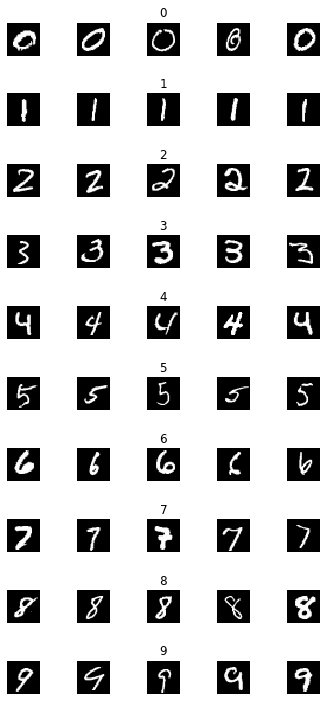

In [52]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout() #prevent overlapping of the axis

# create a nested for loop to plot data
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        # Pick some random indexes of the selected image which classes corresponds
        # to the row index of our subplot. Followed by :, : because we want to
        # show the whole 28 by 28 pixel of the image.
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

Plot a bar graph showing how much samples we got for each classes in the MNIST dataset.

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

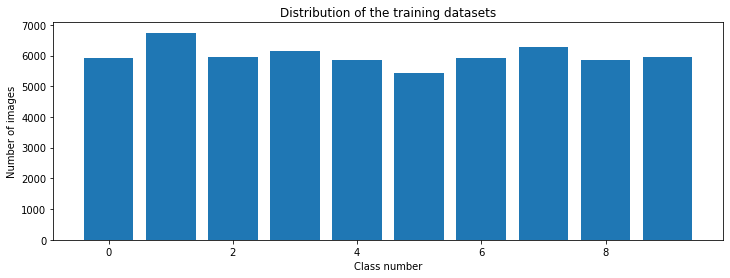

In [53]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training datasets")
plt.xlabel("Class number")
plt.ylabel("Number of images")

### Preparing the data
Make sure to one hot encode the dataset labels.

In [54]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Normalizing the data
Take our training data and divide by 255. Why? Our training data contains 60000 grayscale images with each image containing pixel intensities. from 0 to 255. Therefore by dividing by 255, this ensures that the maximum pixel value of 255 to be normalized down to 1.

Normalization is important because it scales down our features to a uniform range and decrease the variance in our data, due to the nature of mathematical operations used inside the neural network.
This helps the neural network deal better with the input data and to learn more quickly and accurately.

In [55]:
X_train = X_train/255
X_test = X_test/255

### Reformat the data

Our neural network cannot take input of a 28x28 pixel. Therefore we must flatten the pixels into a 784x1 array, which would later act as the input node for the neural network.

In [56]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Creating the model
As usual, we will create the model using the Sequential and Dense. Hidden layers in the neural network will play a crucial part for the MNIST dataset. 

There isn't any concrete answer on how many hidden layers we should have, so experimenting with the hidden layers is crucial. Remember a model too complex results in overfitting and a model too simple results in underfitting.

In [57]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [58]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In the model.fit(), this time we use validation_split so that a percentage of the training data will be our validation data

In [59]:
history = model.fit(x = X_train, y = y_train, validation_split = 0.1, epochs = 20, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 27us/sample - loss: 0.5550 - accuracy: 0.8295 - val_loss: 0.2119 - val_accuracy: 0.9373
Epoch 2/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.2648 - accuracy: 0.9234 - val_loss: 0.1995 - val_accuracy: 0.9407
Epoch 3/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.2293 - accuracy: 0.9338 - val_loss: 0.1983 - val_accuracy: 0.9437
Epoch 4/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.2130 - accuracy: 0.9374 - val_loss: 0.1799 - val_accuracy: 0.9473
Epoch 5/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.2045 - accuracy: 0.9396 - val_loss: 0.1963 - val_accuracy: 0.9437
Epoch 6/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.1972 - accuracy: 0.9413 - val_loss: 0.1760 - val_accuracy: 0.9485
Epoch 7/20
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

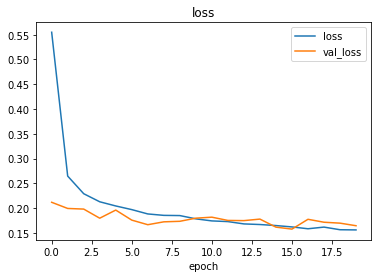

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

In the plot above, it looks like the validation loss is consistently lower than the training loss, which makes sense.

The training loss is calculated over the enitre training data set (90% of the data set) where as the validation loss is calculated over the entire validation set (10% of the data set).

So naturally you would expect a smaller loss on the validation. But at the same time, the training loss has a lot of hard sets to learn, as for the validation, it is based off a model that has been trained and this has easier cases to predict and only fine tunes the hyper parameters of the model.

The more epoch we run, the more the training loss is the same as the validation loss. But remember that the more the epoch can cause overfitting (validation error higher than the training error)

Text(0.5, 0, 'epoch')

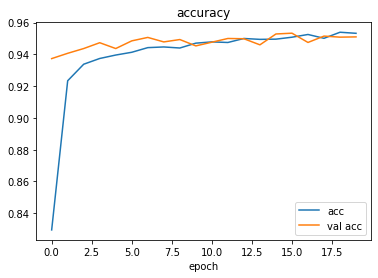

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val acc'])
plt.title('accuracy')
plt.xlabel('epoch')

### Example of an overfitting model:

Below is an example of an overfitting model, where the model is too complex (a million parameters) compared to the previous model.

On an overfitting model, the training loss is lower than the validation loss.

In [62]:
def create_overfit_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(num_pixels, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [63]:
overfit_model = create_overfit_model()
overfit_model.summary()
overfit_history = model.fit(x = X_train, y = y_train, validation_split = 0.1, epochs = 20, batch_size = 200, verbose = 1, shuffle = 1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_20 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 18us/sample - loss: 0.1554 - accuracy: 0.9530 - val_loss: 0.1655 - val_accuracy: 0.9517
Epoch 2/20
54000/54000 [==============================] - 1s 18us/sample - loss: 0.1511 - accuracy: 0.9544 - val_loss: 0.1660 - val_accuracy: 0.9527
Epoch 3/20
54000/54000 [===

Text(0.5, 0, 'epoch')

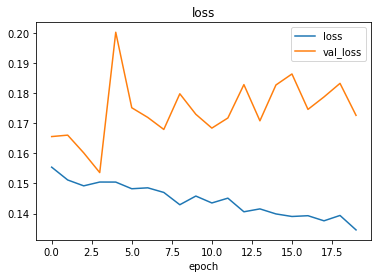

In [64]:
plt.plot(overfit_history.history['loss'])
plt.plot(overfit_history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

### Print out the score.

In [65]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test Accuracy', score[1])

<class 'list'>
Test score: 0.21676624402403832
Test Accuracy 0.9429


### Test model using a random data from the internet.

'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png' is the resource.

<Response [200]>


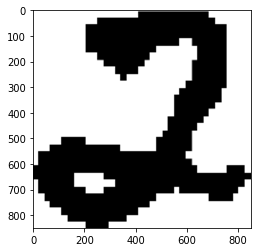

In [66]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

Remember to preprocess the outsourced image so that it has the same format as the MNIST image that was used to train the model.

(850, 850, 4)
(28, 28, 4)
(28, 28)


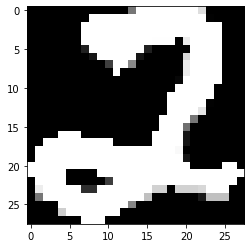

In [67]:
import cv2
img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28, 28))
print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [68]:
image = image/255
image = image.reshape(1, 784)

In [69]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]
